In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('20231207-0001_shelving_434_8545-434_8539_M2etalonLocked_cleaned.csv',skiprows=1)



# Plot data and zoom in on ROI

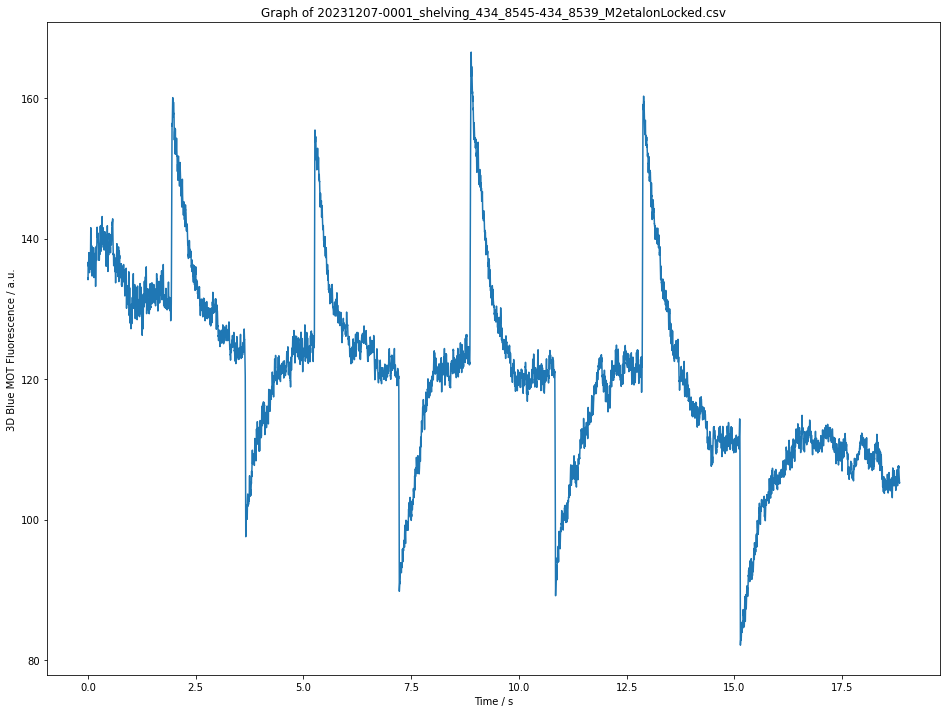

In [43]:
# Plot the graph
plt.figure(figsize=(16, 12))
plt.plot(df['(s)'], df['(mV)'], '-')
plt.xlabel('Time / s')
plt.ylabel('3D Blue MOT Fluorescence / a.u.')
plt.title('Graph of 20231207-0001_shelving_434_8545-434_8539_M2etalonLocked_cleaned.csv')
plt.show()


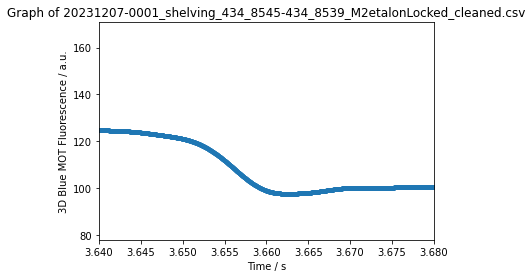

In [143]:
# plt.figure(figsize=(16, 12))
plt.plot(df['(s)'], df['(mV)'], '.')
plt.xlabel('Time / s')
plt.ylabel('3D Blue MOT Fluorescence / a.u.')
plt.title('Graph of 20231207-0001_shelving_434_8545-434_8539_M2etalonLocked_cleaned.csv')

# Set the limits of the x-axis to zoom in on the desired part
plt.xlim(3.64, 3.68)

plt.show()


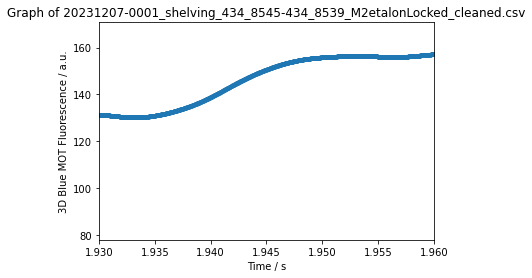

In [148]:
# plt.figure(figsize=(16, 12))
plt.plot(df['(s)'], df['(mV)'], '.')
plt.xlabel('Time / s')
plt.ylabel('3D Blue MOT Fluorescence / a.u.')
plt.title('Graph of 20231207-0001_shelving_434_8545-434_8539_M2etalonLocked_cleaned.csv')

# Set the limits of the x-axis to zoom in on the desired part
plt.xlim(1.930,1.960)

plt.show()


# Collect data that's in ROI

## Re-center start point as t=0

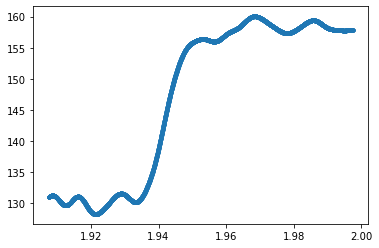

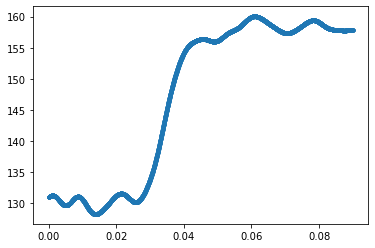

In [156]:
# Slice data into ROI
time_step = df.iloc[1,0]-df.iloc[0,0]
start_time = 1.9075
end_time = 1.9975
start_slice = int(start_time/time_step)
end_slice = int(end_time/time_step)

#Make time start a t=0 in ROI
t_data = df['(s)'][start_slice:end_slice]
experimental_data = df['(mV)'][start_slice:end_slice]
recentered_t_data = t_data - t_data.iloc[0]

plt.figure()
plt.plot(t_data, experimental_data, '.')

plt.figure()
plt.plot(recentered_t_data, experimental_data, '.')


# Rough parameter space search 

## Using raw data from above for initial guess for fitting later

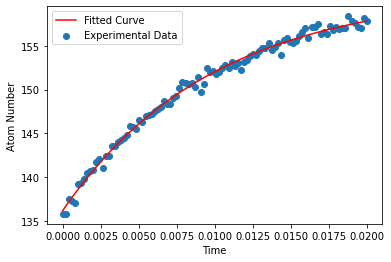

Fitted Parameters:
N_start: 122.81120924540248
N0: 24.988674867995638
Time Constant Tau: 0.00989196011926362
Loading Rate: 53.919946377120205


In [159]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the two-level model for MOT loading
def mot_loading(t,N_start,N0,tau,loading_rate):
    '''
    Function to fit to the MOT atom number data.
    Gives the MOT atom number N(t) as a function of time.
    Tau is the time constant of the exponential decay.
    N0 is the scaling factor of number of atoms, attached to the coefficient of the exponential
    N_start is the start point of the loading/decay, kind of like an offset constant
    '''
    return N0*(1-np.exp(-t/tau)+loading_rate*tau) + N_start
# def mot_loading(t, N0, loading_rate, loss_rate):
#     return N0 * (1 - np.exp(-loading_rate * t)) / (1 + loading_rate / loss_rate * np.exp(-loss_rate * t))


# Generate example data
t_data = np.linspace(0,0.02, 100)  # Time points
experimental_data = mot_loading(t_data, N_start=130, N0=25, tau=0.01, loading_rate=25) + np.random.normal(scale=0.5, size=len(t_data))

# Fit the model to the experimental data
initial_guess = [130, 25, 0.01, 25]  # Initial guess for parameters in order of: N_start, N0, tau, loading_rate
fit_params, covariance = curve_fit(mot_loading, t_data, experimental_data, p0=initial_guess)

# Plot the experimental data and the fitted curve
plt.scatter(t_data, experimental_data, label='Experimental Data')
plt.plot(t_data, mot_loading(t_data, *fit_params), label='Fitted Curve', color='red')
plt.xlabel('Time')
plt.ylabel('Atom Number')
plt.legend()
plt.show()

# Print the fitted parameters
print('Fitted Parameters:')
print('N_start:', fit_params[0])
print('N0:', fit_params[1])
print('Time Constant Tau:', fit_params[2])
print('Loading Rate:', fit_params[3])


# Compare rough parameter search and raw data

## If both look similar, then cotinue with actually fitting our raw data to the model

# Fit and plot data to model

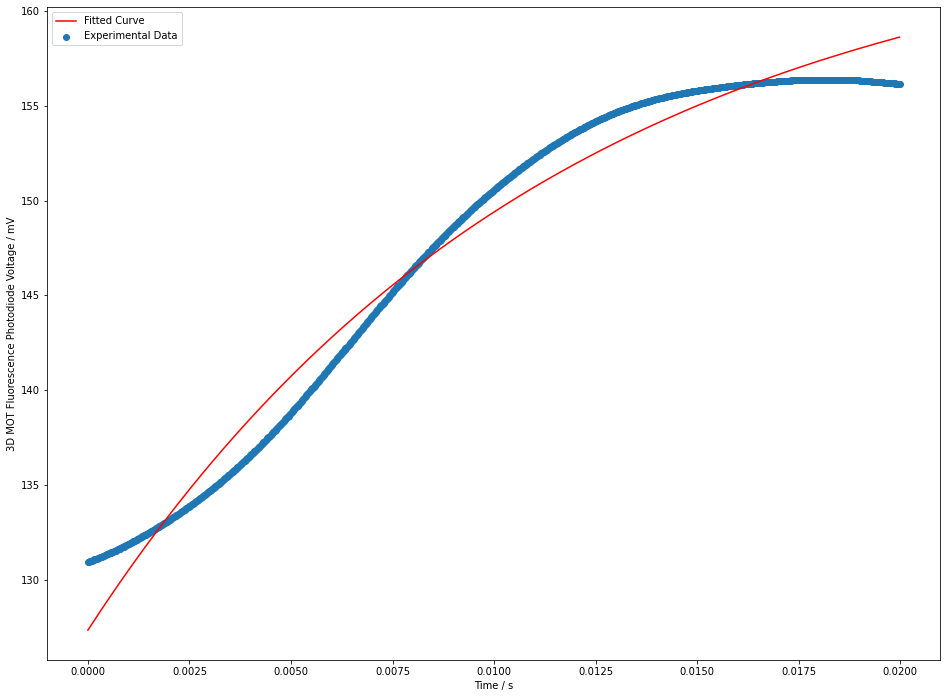

Fitted Parameters:
N_start: 109.94892560796245
N0: 37.95054509492233
Time Constant Tau: 0.011478453054925975
Loading Rate: 39.91623194901002


In [164]:
#Fitting model

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the two-level model for MOT loading
def mot_loading(t,N_start,N0,tau,loading_rate):
    '''
    Function to fit to the MOT atom number data.
    Gives the MOT atom number N(t) as a function of time.
    Tau is the time constant of the exponential decay.
    N0 is the scaling factor of number of atoms, attached to the coefficient of the exponential
    N_start is the start point of the loading/decay, kind of like an offset constant
    '''
    return N0*(1-np.exp(-t/tau)+loading_rate*tau) + N_start

# Process data

# Slice data into ROI
time_step = df.iloc[1,0]-df.iloc[0,0]
start_time = 1.935
end_time = 1.955
start_slice = int(start_time/time_step)
end_slice = int(end_time/time_step)

#Make time start a t=0 in ROI
t_data = df['(s)'][start_slice:end_slice]
experimental_data = df['(mV)'][start_slice:end_slice]
recentered_t_data = t_data - t_data.iloc[0]

# Fit the model to the experimental data
initial_guess = [130, 25, 0.1, 70]  # Initial guess for parameters in order of: N_start, N0, tau, loading_rate
fit_params, covariance = curve_fit(mot_loading, recentered_t_data, experimental_data, p0=initial_guess)

# Plot the experimental data and the fitted curve
plt.figure(figsize=(16, 12))
plt.scatter(recentered_t_data, experimental_data, label='Experimental Data')
plt.plot(recentered_t_data, mot_loading(recentered_t_data, *fit_params), label='Fitted Curve', color='red')
plt.xlabel('Time / s')
plt.ylabel('3D MOT Fluorescence Photodiode Voltage / mV')
plt.legend()
plt.show()

# Print the fitted parameters
print('Fitted Parameters:')
print('N_start:', fit_params[0])
print('N0:', fit_params[1])
print('Time Constant Tau:', fit_params[2])
print('Loading Rate:', fit_params[3])